In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("https://rsearchprojectstorage1.blob.core.windows.net/dataset/pone.0200122.s003.csv2.csv")

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVRfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# train a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# train a SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# make predictions on the test data
rf_y_pred = rf_model.predict(X_test)
dt_y_pred = dt_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)

In [ ]:
# evaluate the models using RMSE, R2, and MSE metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

In [ ]:
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_y_pred))
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)


In [ ]:
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_y_pred))
svm_r2 = r2_score(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_mae = mean_absolute_error(y_test, svm_y_pred)

In [ ]:
print("Random Forest:")
print("MSE: {:.6f}".format(rf_mse))
print("RMSE: {:.6f}".format(rf_rmse))
print("R2 Score: {:.6f}".format(rf_r2))
print("MAE: {:.6f}".format(rf_mae))

Random Forest:
MSE: 0.000348
RMSE: 0.018654
R2 Score: 0.955832
MAE: 0.014313


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Define the hyperparameter grid to search
hyperparameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
 #Use RandomizedSearchCV to search the hyperparameter grid
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = hyperparameters,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, verbose=2)

In [ ]:
# Select the best model
best_rf_model = rf_random.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(rf_random.best_params_)

Best Hyperparameters:
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [ ]:
y_pred = best_rf_model.predict(X_test)
print("MSE: {:.6f}".format(rf_mse))
print("RMSE: {:.6f}".format(rf_rmse))
print("R2 Score: {:.6f}".format(rf_r2))
print("MAE: {:.6f}".format(rf_mae))

MSE: 0.000348
RMSE: 0.018654
R2 Score: 0.955832
MAE: 0.014313


In [ ]:
# Print the model's parameters
print("Model parameters:")
for param_name in sorted(best_rf_model.get_params().keys()):
    print("\t%s: %r" % (param_name, best_rf_model.get_params()[param_name]))

Model parameters:
	bootstrap: True
	ccp_alpha: 0.0
	criterion: 'squared_error'
	max_depth: 20
	max_features: 'sqrt'
	max_leaf_nodes: None
	max_samples: None
	min_impurity_decrease: 0.0
	min_samples_leaf: 1
	min_samples_split: 2
	min_weight_fraction_leaf: 0.0
	n_estimators: 10
	n_jobs: None
	oob_score: False
	random_state: 42
	verbose: 0
	warm_start: False


In [ ]:
print("Decision Tree:")
print("MSE: {:.6f}".format(dt_mse))
print("RMSE: {:.6f}".format(dt_rmse))
print("R2 Score: {:.6f}".format(dt_r2))
print("MAE: {:.6f}".format(dt_mae))

Decision Tree:
MSE: 0.000762
RMSE: 0.027601
R2 Score: 0.903307
MAE: 0.019965


In [ ]:
print("SVM:")
print("MSE: {:.6f}".format(svm_mse))
print("RMSE: {:.6f}".format(svm_rmse))
print("R2 Score: {:.6f}".format(svm_r2))
print("MAE: {:.6f}".format(svm_mae))

SVM:
MSE: 0.002823
RMSE: 0.053130
R2 Score: 0.641708
MAE: 0.043727


In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz 


In [ ]:
feature_names = ["Duration",
"Heigh",
"Weight",
"BMI",
"Age",
"Sex",
"Religion",
"Education",
"Marital_status",
"Monthly_income",
"Work_type",
"TV",
"Fan",
"Electricity",
"Wardrobe",
"Refrigerator",
"Bank_account",
"Floor_material",
"Wall_material",
"Daily_workhours",
"Daily_Overtimehours",
"Neck_pain",
"Onset_AgeNP",
"Duration_MonthsNP",
"Hospitalized_NP",
"Duty_ChangeNP",
"Had_trouble_12Months_NP",
"Had_trouble_1month_NP",
"Had_trouble_today_NP",
"Work_prevented_NP",
"Seen_doctor_NP",
"Medication_NP",
"Sick_leave_NP",
"Shoulder_pain",
"Onset_AgeSP",
"Duration_Months_SP",
"Hospitalized_SP",
"Duty_Change_SP",
"Had_trouble_12Months_SP",
"Had_trouble_1month_SP",
"Had_trouble_today_SP",
"Work_prevented_SP",
"Seen_doctor_SP",
"Medication_SP",
"Sick_leave_SP",
"Upper_Back_pain",
"Onset_Age_UBP",
"Duration_Months_UBP",
"Hospitalized_UBP",
"Duty_Change_UBP",
"Had_trouble_12Months_UBP",
"Had_trouble_1month_UBP",
"Had_trouble_today_UBP",
"Work_prevented_UBP",
"Seen_doctor_UBP",
"Medication_UBP",
"Sick_leave_UBP",
"Elbow_pain",
"Onset_Age_EP",
"Duration_Months_EP",
"Hospitalized_EP",
"Duty_Change_EP",
"Had_trouble_12Months_EP",
"Had_trouble_1month_EP",
"Had_trouble_today_EP",
"Work_prevented_EP",
"Seen_doctor_EP",
"Medication_EP",
"Sick_leave_EP",
"Wrist_hand_pain",
"Onset_Age_WHP",
"Duration_Months_WHP",
"Hospitalized_WHP",
"Duty_Change_WHP",
"Had_trouble_12Months_WHP",
"Had_trouble_1month_WHP",
"Had_trouble_today_WHP",
"Work_prevented_WHP",
"Seen_doctor_WHP",
"Medication_WHP",
"Sick_leave_WHP",
"Lower_Back_pain",
"Onset_Age_LBP",
"Duration_Months_LBP",
"Hospitalized_LBP",
"Duty_Change_LBP",
"Had_trouble_12Months_LBP",
"Had_trouble_1month_LBP",
"Had_trouble_today_LBP",
"Work_prevented_LBP",
"Seen_doctor_LBP",
"Medication_LBP",
"Sick_leave_LBP",
"Hip_Thigh_pain",
"Onset_Age_HTP",
"Duration_Months_HTP",
"Hospitalized_HTP",
"Duty_Change_HTP",
"Had_trouble_12Months_HTP",
"Had_trouble_1month_HTP",
"Had_trouble_today_HTP",
"Work_prevented_HTP",
"Seen_doctor_HTP",
"Medication_HTP",
"Sick_leave_HTP",
"Knee_pain",
"Onset_Age_KP",
"Duration_Months_KP",
"Hospitalized_KP",
"Duty_Change_KP",
"Had_trouble_12Months_KP",
"Had_trouble_1month_KP",
"Had_trouble_today_KP",
"Work_prevented_KP",
"Seen_doctor_KP",
"Medication_KP",
"Sick_leave_KP",
"Ankle_Feet_pain",
"Onset_Age_AFP",
"Duration_Months_AFP",
"Hospitalized_AFP",
"Duty_Change_AFP",
"Had_trouble_12Months_AFP",
"Had_trouble_1month_AFP",
"Had_trouble_today_AFP",
"Work_prevented_AFP",
"Seen_doctor_AFP",
"Medication_AFP",
"Sick_leave_AFP",
"Risk_score_back",
"Risk_score_shoulder_arm",
"Risk_score_wrist_hand",
"Risk_score_neck",
"Risk_score_vibration",
"Risk_score_pace",
"Risk_score_stress",
"Back_dynamic",
"Back_Static",
]

In [ ]:
dot_data = export_graphviz(dt_model, out_file=None, 
                      feature_names=feature_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  


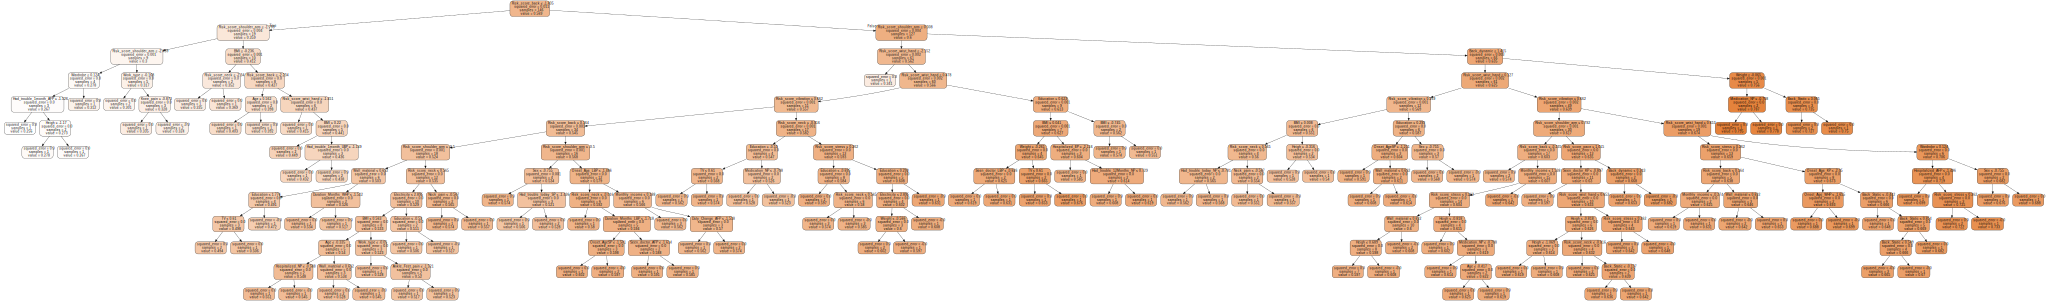

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render("_research")

'_research.pdf'